In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split 
from sklearn import svm, datasets
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [0]:
def make_meshgrid(x, y,h=0.03):
    x_min, x_max = x.min()-1, x.max() + 1
    y_min, y_max = y.min()-1, y.max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max,0.03), np.arange(y_min, y_max, 0.03))
    return xx, yy

def plot_contours(ax, clf, xx, yy,test_x,test_y):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    out = ax.scatter(test_x[:,0], test_x[:,1], c=test_y, cmap=plt.cm.Paired)
    return out

In [8]:
iris = datasets.load_iris()

X = iris.data
Y = iris.target
svc = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(svc, X,Y, cv=5)  
scores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
print((scores.mean()))

0.9800000000000001


In [0]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),np.arange(y_min, y_max,h))

ValueError: ignored

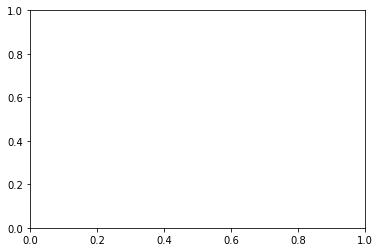

In [11]:
plt.subplot(1, 1, 1)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [0]:
iris = pd.read_csv("iris-data.txt").values
per = 3*10
coll = 3*5
test_size = 150 - 3*coll
print("Train Size: ",3*coll)
print("Test Size: ",test_size)

#train
f1 = iris[0:coll,2:4]
f2 = iris[49:49+coll,2:4]
f3 = iris[99:99+coll,2:4]
features = np.vstack((f1,f2,f3))

l1 = iris[0:coll,-1]
l2 = iris[49:49+coll,-1]
l3 = iris[99:99+coll,-1]
level = np.hstack((l1,l2,l3))
level = np.transpose(level)

#test
tf1 = iris[coll:50,2:4]
tf2 = iris[50+coll:100,2:4]
tf3 = iris[100+coll:150,2:4]
test_x = np.vstack((tf1,tf2,tf3))


tl1 = iris[coll:50,-1]
tl2 = iris[50+coll:100,-1]
tl3 = iris[100+coll:150,-1]
test_y = np.hstack((tl1,tl2,tl3))
test_y = np.transpose(test_y)
cl1 = 50-3*5

Train Size:  45
Test Size:  105


In [0]:
# create positive and negative samples for each class
level1 = np.zeros(3*coll)
level2 = np.zeros(3*coll)
level3 = np.zeros(3*coll)
for i in range(3*coll):
    if i>=0 and i<coll:
        level1[i] = 1
    elif i>=coll and i<2*coll:
        level2[i] = 1
    elif i>=2*coll and i<3*coll:
        level3[i]=1
print(level3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
svc1 = SVC(kernel='rbf').fit(features,level1)
svc2 = SVC(kernel='rbf').fit(features,level2)
svc3 = SVC(kernel='rbf').fit(features,level3)

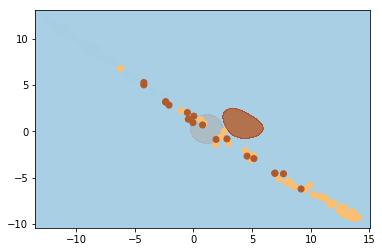

In [0]:
X0,X1 = test_x[:,0],test_x[:,1]
xx,yy = make_meshgrid(X0,X1)
fig,ax = plt.subplots()
plot_contours(ax,svc1,xx,yy,test_x,test_y)
plot_contours(ax,svc2,xx,yy,test_x,test_y)

In [0]:
s=np.zeros(3)
c=0
ac1=ac2=ac3=0
for i in range(len(test_x)):
    
    s[0] = svc1.decision_function(test_x[i].reshape(1,-1))
    s[1] = svc2.decision_function(test_x[i].reshape(1,-1))
    s[2] = svc3.decision_function(test_x[i].reshape(1,-1))
    
    m = max(s)
    if m == s[0] and test_y[i]==0:
        c+=1
        ac1+=1
    elif m == s[1] and test_y[i]==1:
        c+=1
        ac2+=1
    elif m == s[2] and test_y[i]==2:
        c+=1
        ac3+=1
acc = 100*(c/test_size)
print("Accuracy:  ",acc)
print("Class I: ",100*ac1/cl1)
print("Class II: ",100*ac2/cl1)
print("Class III: ",100*ac3/cl1)

Accuracy:   94.28571428571428
Class I:  97.14285714285714
Class II:  94.28571428571429
Class III:  91.42857142857143


In [0]:
wine = datasets.load_wine()
X = wine.data
Y = wine.target

In [0]:
from sklearn.manifold import TSNE
import seaborn as sn
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(X)

(178, 3)


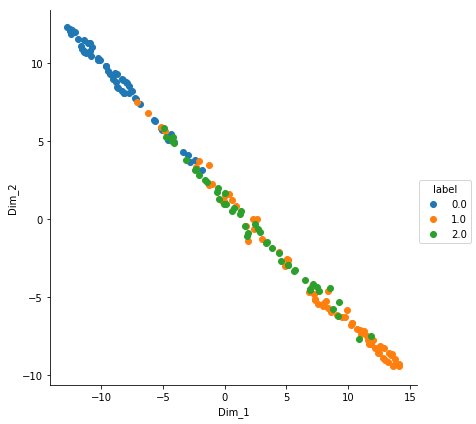

In [0]:
tsne_data = np.vstack((tsne_data.T, Y)).T
print(tsne_data.shape)
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

In [0]:
f1 = tsne_data[0:30,:]
f2 = tsne_data[59:89,:]
f3 = tsne_data[130:160,:]
features = np.vstack((f1,f2,f3))

l1 = Y[0:30]
l2 = Y[59:89]
l3 = Y[130:160]
level = np.hstack((l1,l2,l3))
level = np.transpose(level)
print(len(features))
print(len(level))

90
90


In [0]:
tf1 = tsne_data[30:59,:]
tf2 = tsne_data[89:130,:]
tf3 = tsne_data[160:178,:]
test_x = np.vstack((tf1,tf2,tf3))


tl1 = Y[30:59]
tl2 = Y[89:130]
tl3 = Y[160:178]
test_y = np.hstack((tl1,tl2,tl3))
test_y = np.transpose(test_y)
print(len(tl3))
print(len(test_x))
print(test_y)

18
88
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [0]:
# create positive and negative samples for each class
level1 = np.zeros(train_size)
level2 = np.zeros(train_size)
level3 = np.zeros(train_size)
for i in range(train_size):
    if i>=0 and i<30:
        level1[i] = 1
    elif i>=30 and i<2*30:
        level2[i] = 1
    elif i>=2*30 and i<3*30:
        level3[i]=1
print(level3)        

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
svm1 = SVC(kernel='rbf').fit(features,level1)
svm2 = SVC(kernel='rbf').fit(features,level2)
svm3 = SVC(kernel='rbf').fit(features,level3)

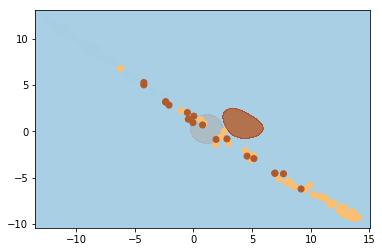

In [0]:
X0,X1 = test_x[:,0],test_x[:,1]
xx,yy = make_meshgrid(X0,X1)
fig,ax = plt.subplots()
plot_contours(ax,svc1,xx,yy,test_x,test_y)
plot_contours(ax,svc2,xx,yy,test_x,test_y)

In [0]:
s=np.zeros(3)
c=0
ac1=ac2=ac3=0
for i in range(len(test_x)):
    
    s[0] = svm1.decision_function(test_x[i].reshape(1,-1))
    s[1] = svm2.decision_function(test_x[i].reshape(1,-1))
    s[2] = svm3.decision_function(test_x[i].reshape(1,-1))
    
    m = max(s)
    if m == s[0] and test_y[i]==0:
        c+=1
        ac1+=1
    elif m == s[1] and test_y[i]==1:
        c+=1
        ac2+=1
    elif m == s[2] and test_y[i]==2:
        c+=1
        ac3+=1
acc = 100*(c/len(test_x))
print("Accuracy:  ",acc)
print("Class I: ",100*ac1/29)
print("Class II: ",100*ac2/41)
print("Class III: ",100*ac3/18)

Accuracy:   92.04545454545455
Class I:  96.55172413793103
Class II:  85.36585365853658
Class III:  100.0
